In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [84]:
%matplotlib inline

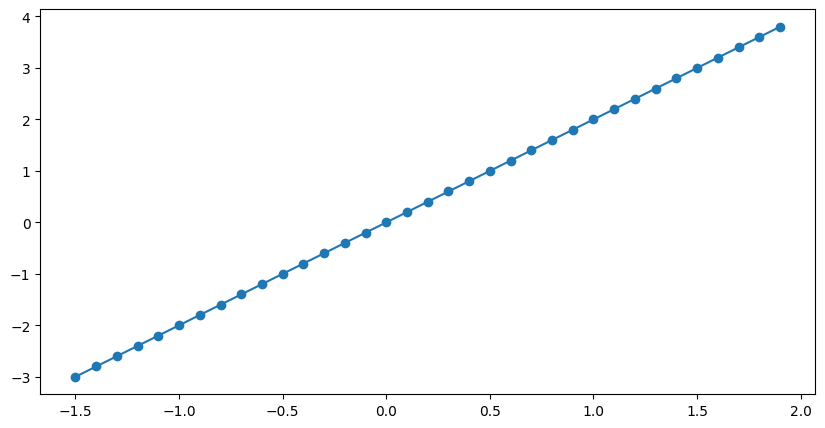

In [85]:
x=np.arange(start=-1.5,stop=2,step=0.1)
y=2*x
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 5)
axes.plot(x,y,marker="o");

In [86]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import random as rd

In [87]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [88]:
model = Sequential()
model.add(Input(name="funcion",shape=(1,)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                     test_size=0.2, random_state=seed)

In [90]:
optimizer=SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
mlp = model.fit(x_train, y_train, validation_data=(x_val,y_val),
                batch_size=1, epochs=8,verbose=1)

Epoch 1/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3815 - mse: 6.3815 - val_loss: 3.0728 - val_mse: 3.0728
Epoch 2/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8456 - mse: 1.8456 - val_loss: 0.8766 - val_mse: 0.8766
Epoch 3/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5607 - mse: 0.5607 - val_loss: 0.2612 - val_mse: 0.2612
Epoch 4/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1789 - mse: 0.1789 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 5/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 6/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 7/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/8
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0011 - val_mse: 0.0011


In [91]:
yp_val=model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


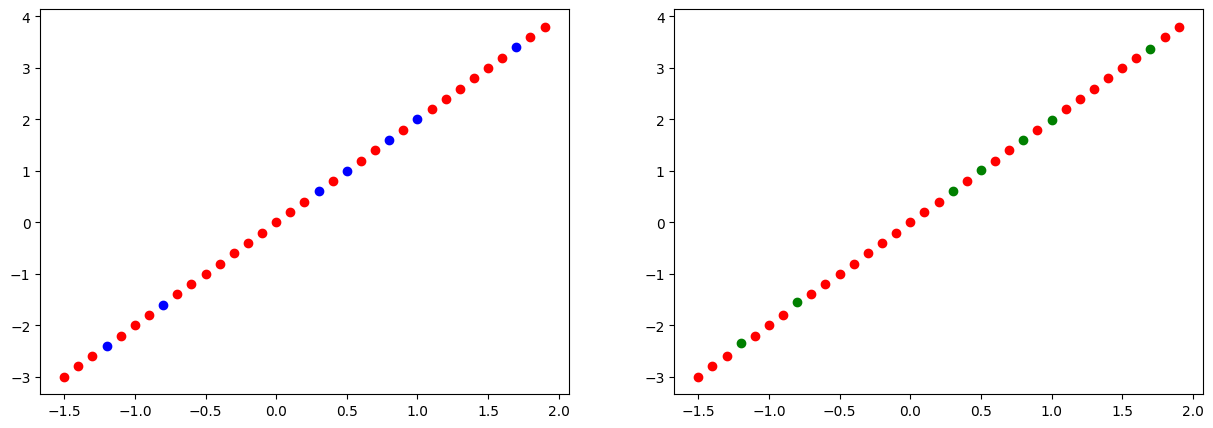

In [92]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
axes[0].scatter(x_train,y_train,c="r")
axes[0].scatter(x_val,y_val,c="b")
axes[1].scatter(x_train,y_train,c="r")
axes[1].scatter(x_val,yp_val,c="g")

In [93]:
model.layers[0].get_weights()

[array([[1.9681202]], dtype=float32), array([0.02476419], dtype=float32)]

In [94]:
W1=np.arange(-2,3,1)
W2=np.arange(-2,1,1)
W1, W2 = np.meshgrid(W1, W2)

In [95]:
W1

array([[-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2],
       [-2, -1,  0,  1,  2]])

In [96]:
W2

array([[-2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0]])

In [97]:
L=y[0]-(W1*x[0]+W2)
L

array([[-4. , -2.5, -1. ,  0.5,  2. ],
       [-5. , -3.5, -2. , -0.5,  1. ],
       [-6. , -4.5, -3. , -1.5,  0. ]])

In [98]:
N=len(x)
L=pow(y[0]-(W1*x[0]+W2),2)
for i in range(1,N):
    L=L+pow(y[i]-(W1*x[i]+W2),2)
L=L/N
L

array([[24.16, 15.94,  9.84,  5.86,  4.  ],
       [19.56, 11.74,  6.04,  2.46,  1.  ],
       [16.96,  9.54,  4.24,  1.06,  0.  ]])

Requiere instalar ipympl
pip3 install ipympl

In [99]:
#%matplotlib widget 

Text(0.5, 0.92, 'Loss surface')

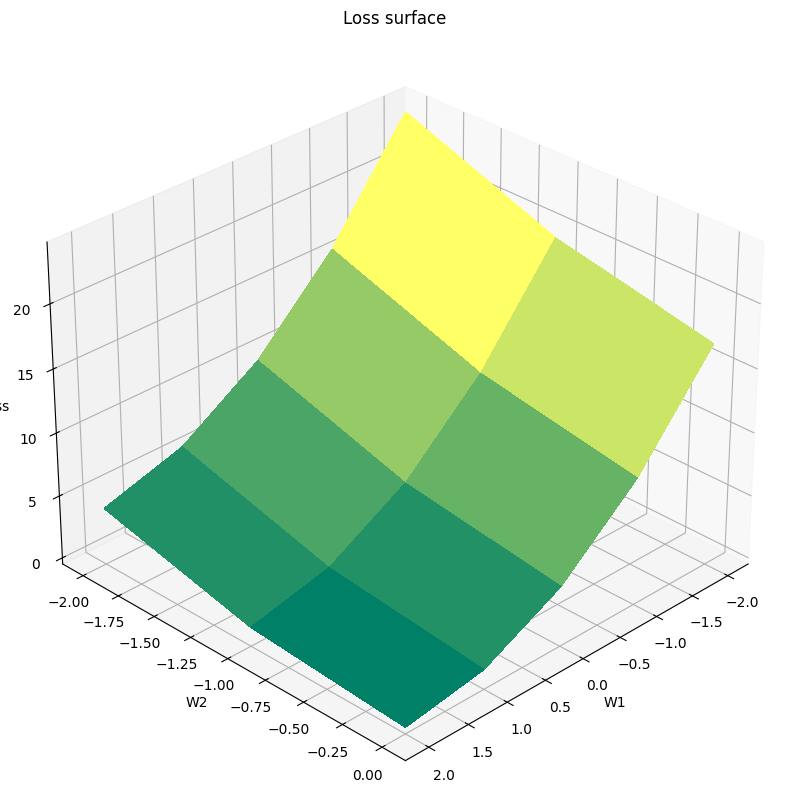

In [100]:
fig, axes = plt.subplots(1,1,subplot_kw={"projection":"3d"})
fig.set_size_inches(10, 10)
surf = axes.plot_surface(W1, W2, L, cmap=cm.summer,
                       linewidth=0, antialiased=False)
axes.view_init(elev=30,azim=45,roll=0)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
axes.set_zlabel('Loss')
plt.title("Loss surface")

Text(0.5, 1.0, 'Contour plot of Loss surface')

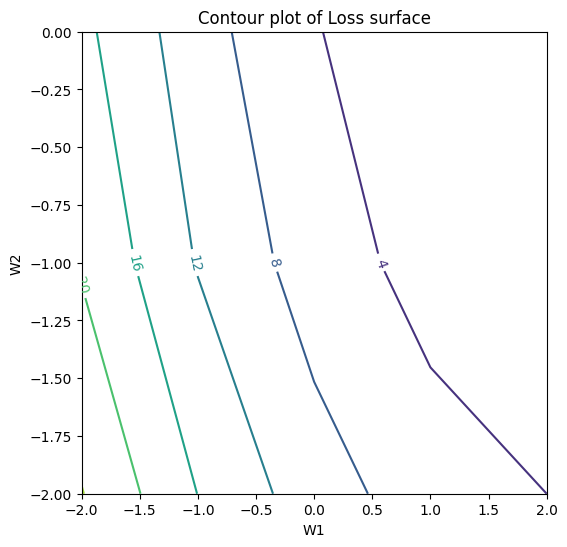

In [101]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(6, 6)
contours = axes.contour(W1, W2, L)
axes.clabel(contours, inline=1, fontsize=10)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
plt.title("Contour plot of Loss surface")

Text(0.5, 1.0, 'Contour plot of Loss surface (Zoomed out)')

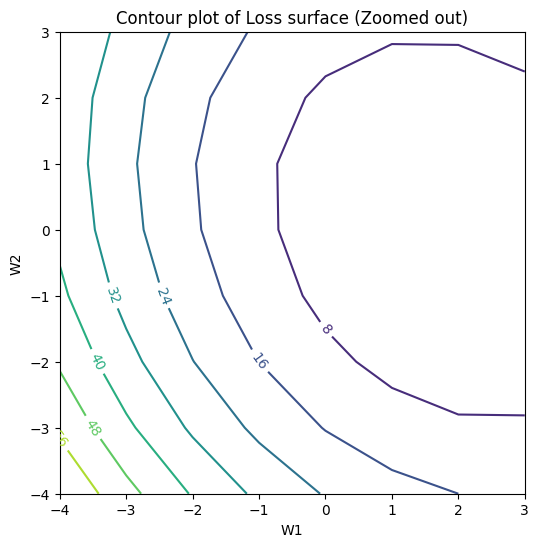

In [102]:
W1=np.arange(-4,4,1)
W2=np.arange(-4,4,1)
W1, W2 = np.meshgrid(W1, W2)
N=len(x)
L=pow(y[0]-(W1*x[0]+W2),2)
for i in range(1,N):
    L=L+pow(y[i]-(W1*x[i]+W2),2)
L=L/N
fig, axes = plt.subplots(1,1)
fig.set_size_inches(6, 6)
contours = axes.contour(W1, W2, L)
axes.clabel(contours, inline=1, fontsize=10)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
plt.title("Contour plot of Loss surface (Zoomed out)")

In [103]:
%matplotlib inline

$
\hat{Y}=mX+b\\
L=(Y-\hat{Y})^2$

Calculamos el gradiente de L

$L=Y^2-2\hat{Y}Y+\hat{Y}^2$

$\frac{\partial{L}}{\partial{m}}=\frac{\partial{L}}{\partial{\hat{Y}}}
\frac{\partial{\hat{Y}}}{\partial{m}}=(2\hat{Y}-2Y)(X)=2mX^2+2bX-2XY$

$\frac{\partial{L}}{\partial{b}}=\frac{\partial{L}}{\partial{\hat{Y}}}
\frac{\partial{\hat{Y}}}{\partial{b}}=(2\hat{Y}-2Y)=2mX+2b-2Y$

In [104]:
from sympy import *

In [105]:
m=Symbol('m')
b=Symbol('b')
x=Symbol('x')
y=Symbol('y')
f=m*x+b
L=(y-f)**2

In [106]:
simplify(diff(L,m))

2*x*(b + m*x - y)

In [107]:
diff(L,b)

2*b + 2*m*x - 2*y

In [108]:
import torch

In [109]:
x=np.arange(start=-1.5,stop=2,step=0.1)
y=2*x
N=len(x)
x=torch.Tensor(x)
y=torch.Tensor(y)
m=torch.asarray([-2.],requires_grad=True)
b=torch.asarray([-2.],requires_grad=True)
Y=m*x+b
Y

tensor([ 1.0000,  0.8000,  0.6000,  0.4000,  0.2000,  0.0000, -0.2000, -0.4000,
        -0.6000, -0.8000, -1.0000, -1.2000, -1.4000, -1.6000, -1.8000, -2.0000,
        -2.2000, -2.4000, -2.6000, -2.8000, -3.0000, -3.2000, -3.4000, -3.6000,
        -3.8000, -4.0000, -4.2000, -4.4000, -4.6000, -4.8000, -5.0000, -5.2000,
        -5.4000, -5.6000, -5.8000], grad_fn=<AddBackward0>)

In [110]:
loss=torch.sum((y-Y)**2)/N
loss

tensor(24.1600, grad_fn=<DivBackward0>)

In [111]:
loss.backward()
m.grad

tensor([-9.2800])

In [112]:
b.grad

tensor([-5.6000])

In [113]:
delta_m=torch.sum(2*x*(b+m*x-y))/N
delta_m

tensor(-9.2800, grad_fn=<DivBackward0>)

In [114]:
delta_b=torch.sum(2*b+2*m*x-2*y)/N
delta_b

tensor(-5.6000, grad_fn=<DivBackward0>)

In [115]:
lr=0.01

In [116]:
m1=m-lr*delta_m
m1

tensor([-1.9072], grad_fn=<SubBackward0>)

In [117]:
b1=b-0.01*delta_b
b1

tensor([-1.9440], grad_fn=<SubBackward0>)

In [118]:
x=np.arange(start=-1.5,stop=2,step=0.1)
y=2*x
N=len(x)
x=torch.Tensor(x)
y=torch.Tensor(y)
m=torch.asarray([-2.],requires_grad=True)
b=torch.asarray([-2.],requires_grad=True)
lr=0.01
Y=m*x+b
loss=torch.sum((y-Y)**2)/N
trayectoria=[]
for i in range(11):
    delta_m=torch.sum(2*x*(b+m*x-y))/N
    delta_b=torch.sum(2*b+2*m*x-2*y)/N
    step=[]
    step.append([m.detach().numpy(),b.detach().numpy(),loss.detach().numpy()])
    m=m-lr*delta_m
    b=b-lr*delta_b
    Y=m*x+b
    loss=torch.sum((y-Y)**2)/N
    step.append([m.detach().numpy(),b.detach().numpy(),loss.detach().numpy()])
    trayectoria.append(step)
print(loss)
    

tensor(14.0675, grad_fn=<DivBackward0>)


In [119]:
x=np.arange(start=-1.5,stop=2,step=0.1)
y=2*x
W1=np.arange(-2,3,1)
W2=np.arange(-2,1,1)
W1, W2 = np.meshgrid(W1, W2)
N=len(x)
L=pow(y[0]-(W1*x[0]+W2),2)
for i in range(1,N):
    L=L+pow(y[i]-(W1*x[i]+W2),2)
L=L/N

Text(0.5, 0.92, 'Gradient descent')

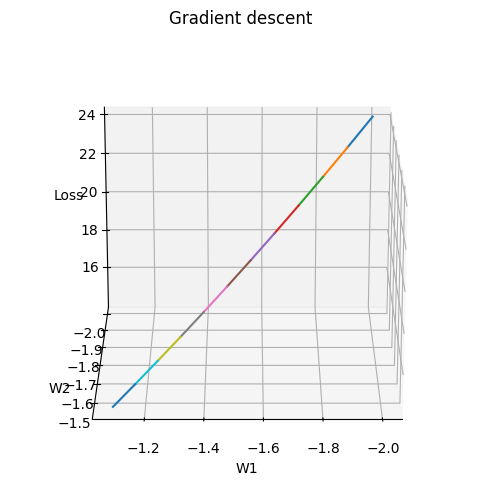

In [120]:
fig, axes = plt.subplots(1,1,subplot_kw={"projection":"3d"})
fig.set_size_inches(6, 6)
for step in trayectoria:
    axes.plot(
    [step[0][0][0],step[1][0][0]],
    [step[0][1][0],step[1][1][0]],
    [step[0][2],step[1][2]])
axes.view_init(elev=20,azim=90,roll=0)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
axes.set_zlabel('Loss')
plt.title("Gradient descent")

Text(0.5, 0.92, 'Gradient descent')

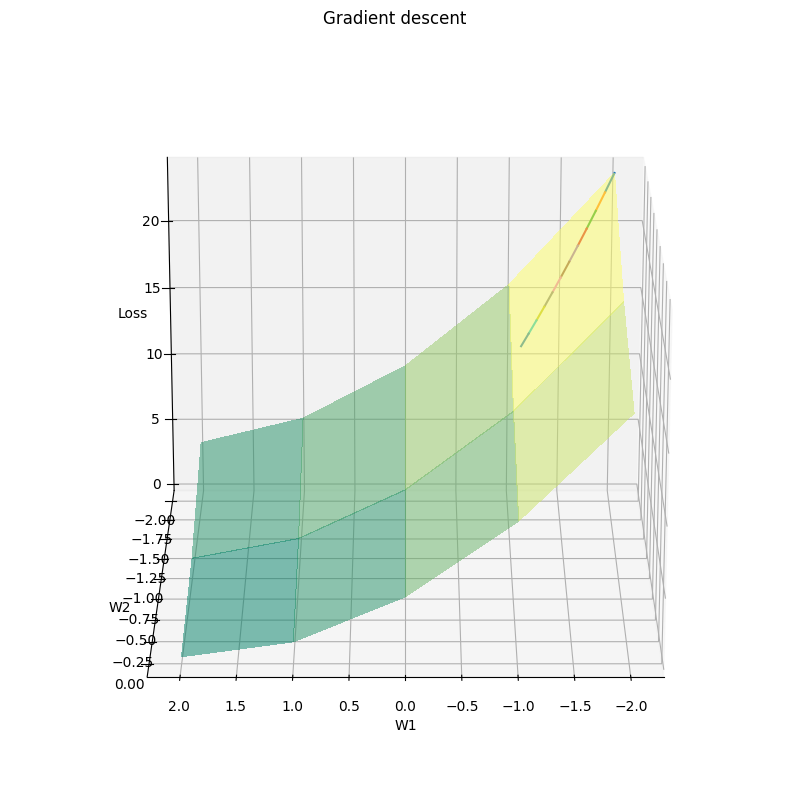

In [121]:
fig, axes = plt.subplots(1,1,subplot_kw={"projection":"3d"})
fig.set_size_inches(10, 10)
surf = axes.plot_surface(W1, W2, L, cmap=cm.summer,
                       linewidth=0, antialiased=False,alpha=0.5)
for step in trayectoria:
    axes.plot(
    [step[0][0][0],step[1][0][0]],
    [step[0][1][0],step[1][1][0]],
    [step[0][2],step[1][2]])
axes.view_init(elev=20,azim=90,roll=0)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
axes.set_zlabel('Loss')
plt.title("Gradient descent")


Ahora agregaremos momentum al cálculo

In [122]:
x=torch.Tensor(x)
y=torch.Tensor(y)
m=torch.asarray([-2.],requires_grad=True)
b=torch.asarray([-2.],requires_grad=True)
Y=m*x+b
optimizer=torch.optim.SGD([m,b],lr=0.01,momentum=0.9)
loss_fn=torch.nn.MSELoss()
trayectoria=[]
step=[]
for i in range(11):
    optimizer.zero_grad()
    Y=m*x+b
    loss=loss_fn(y,Y)
    loss.backward()
    optimizer.step()
    print(i,loss,m,b)
    paso_m=list(m.detach().numpy())
    paso_b=list(b.detach().numpy())
    paso_l=loss.detach().numpy()
    if len(step)==1:
        step.append([paso_m,paso_b,paso_l])
        trayectoria.append(step)
        step=[]
        step.append([paso_m,paso_b,paso_l])
    else:
        step.append([paso_m,paso_b,paso_l])

0 tensor(24.1600, grad_fn=<MseLossBackward0>) tensor([-1.9072], requires_grad=True) tensor([-1.9440], requires_grad=True)
1 tensor(22.9996, grad_fn=<MseLossBackward0>) tensor([-1.7331], requires_grad=True) tensor([-1.8391], requires_grad=True)
2 tensor(20.9004, grad_fn=<MseLossBackward0>) tensor([-1.4899], requires_grad=True) tensor([-1.6930], requires_grad=True)
3 tensor(18.1392, grad_fn=<MseLossBackward0>) tensor([-1.1902], requires_grad=True) tensor([-1.5136], requires_grad=True)
4 tensor(15.0106, grad_fn=<MseLossBackward0>) tensor([-0.8468], requires_grad=True) tensor([-1.3092], requires_grad=True)
5 tensor(11.7955, grad_fn=<MseLossBackward0>) tensor([-0.4722], requires_grad=True) tensor([-1.0876], requires_grad=True)
6 tensor(8.7370, grad_fn=<MseLossBackward0>) tensor([-0.0783], requires_grad=True) tensor([-0.8566], requires_grad=True)
7 tensor(6.0243, grad_fn=<MseLossBackward0>) tensor([0.3237], requires_grad=True) tensor([-0.6232], requires_grad=True)
8 tensor(3.7847, grad_fn=<M

Text(0.5, 0.92, 'Gradient descent')

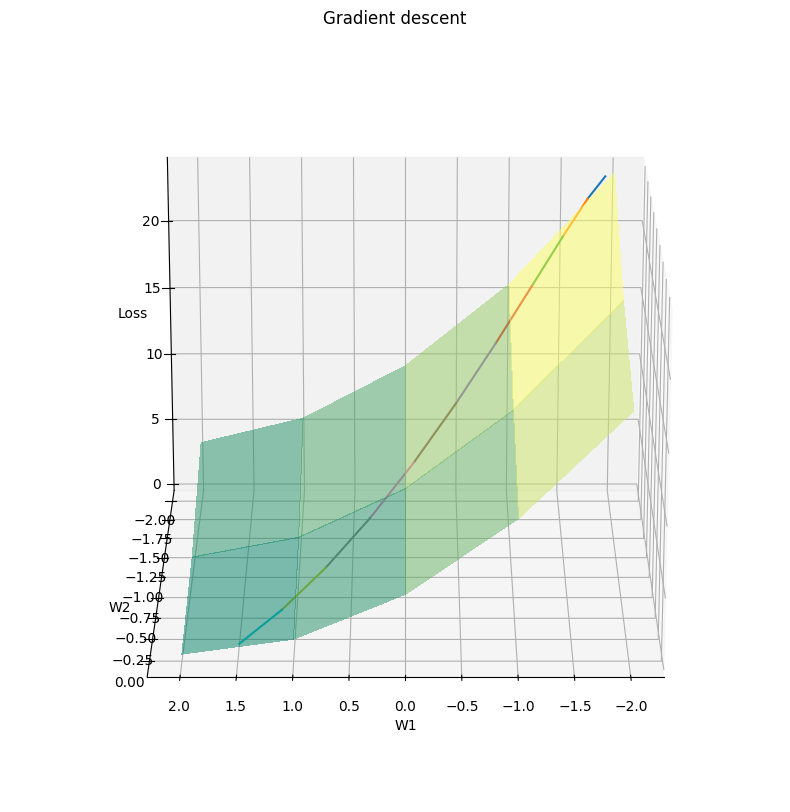

In [123]:
fig, axes = plt.subplots(1,1,subplot_kw={"projection":"3d"})
fig.set_size_inches(10, 10)
surf = axes.plot_surface(W1, W2, L, cmap=cm.summer,
                       linewidth=0, antialiased=False,alpha=0.5)
for step in trayectoria:
    axes.plot(
    [step[0][0][0],step[1][0][0]],
    [step[0][1][0],step[1][1][0]],
    [step[0][2],step[1][2]])
axes.view_init(elev=20,azim=90,roll=0)
axes.set_xlabel('W1')
axes.set_ylabel('W2')
axes.set_zlabel('Loss')
plt.title("Gradient descent")